In [1]:
%matplotlib inline

import logging

import emcee
import h5py
import numpy as np
import matplotlib.pyplot as plt

from os import path
import sys
sys.path.insert(0, path.abspath('../'))

from src import workdir, parse_model_parameter_file
from src.emulator import Emulator
from src.mcmc import Chain

In [2]:
exp_path = "../expdata/expdata.txt"
model_par = "../model_parameter_dict_examples/IPGlasmaDiffraction.txt"
training_set = "../training_data"
mymcmc = Chain(expdata_path=exp_path, model_parafile=model_par,
               training_data_path=training_set)

[INFO][mcmc] Initializing MCMC ...
[INFO][mcmc] Final Markov Chain results will be saved in mcmc/chain.h5
[INFO][mcmc] Loading the model parameters space from ../model_parameter_dict_examples/IPGlasmaDiffraction.txt ...
[INFO][mcmc] Loading the experiment data from ../expdata/expdata.txt ...
[INFO][mcmc] Initializing emulators for the training model ...
[INFO][emulator] loading training data from ../training_data ...
[INFO][emulator] All training data are loaded.
[INFO][emulator] 10 PCs explain 0.99999 of variance
[INFO][emulator] Training emulators...
[INFO][emulator] GP 0: 0.89559 of variance, LML = 62.827, kernel: 3.3**2 * RBF(length_scale=[5.36, 65.4, 20.4, 4.39, 19.4, 1.28]) + WhiteKernel(noise_level=0.00324)
[INFO][emulator] GP 1: 0.05621 of variance, LML = -23.29, kernel: 3.04**2 * RBF(length_scale=[2.71, 12.4, 28.1, 4.89, 6.39, 2.18]) + WhiteKernel(noise_level=0.0219)
[INFO][emulator] GP 2: 0.02902 of variance, LML = -52.911, kernel: 2.57**2 * RBF(length_scale=[2.52, 23.7, 6.8,

/usr/local/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:411: ConvergenceWarning: The optimal value found for dimension 5 of parameter k1__k2__length_scale is close to the specified upper bound 130.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "
/usr/local/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 2 of parameter k1__k2__length_scale is close to the specified lower bound 0.099. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


In [3]:
nsteps = 10000
nwalkers = 100
nburnsteps = 2000
status = None
sampler = mymcmc.run_mcmc(nsteps=nsteps, nburnsteps=nburnsteps,
                          nwalkers=nwalkers, status=status)

[INFO][mcmc] Starting MCMC ...
[INFO][mcmc] no existing chain found, starting initial burn-in
[INFO][mcmc] running 100 walkers for 1000 steps
[INFO][mcmc] step 100: acceptance fraction: mean 0.2493, std 0.0928, min 0.0100, max 0.4200
[INFO][mcmc] step 200: acceptance fraction: mean 0.2654, std 0.0929, min 0.0200, max 0.4100
[INFO][mcmc] step 300: acceptance fraction: mean 0.2688, std 0.0949, min 0.0167, max 0.4033
[INFO][mcmc] step 400: acceptance fraction: mean 0.2683, std 0.0937, min 0.0150, max 0.3950
[INFO][mcmc] step 500: acceptance fraction: mean 0.2689, std 0.0931, min 0.0120, max 0.3840
[INFO][mcmc] step 600: acceptance fraction: mean 0.2712, std 0.0937, min 0.0100, max 0.3750
[INFO][mcmc] step 700: acceptance fraction: mean 0.2725, std 0.0935, min 0.0114, max 0.3743
[INFO][mcmc] step 800: acceptance fraction: mean 0.2739, std 0.0927, min 0.0100, max 0.3725
[INFO][mcmc] step 900: acceptance fraction: mean 0.2743, std 0.0915, min 0.0122, max 0.3833
[INFO][mcmc] step 1000: accept

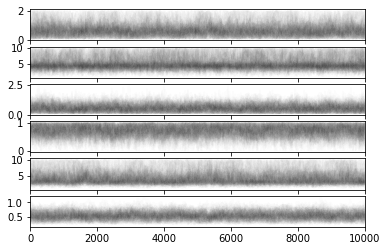

m = 0.6201^{+0.4999}_{-0.3435}
BG = 4.6341^{+2.8330}_{-1.1420}
BGq = 0.5455^{+0.3622}_{-0.2935}
smearQsWidth = 0.7302^{+0.1860}_{-0.2248}
Nq = 3.7908^{+2.6490}_{-1.2452}
QsmuRatio = 0.5426^{+0.1641}_{-0.1382}


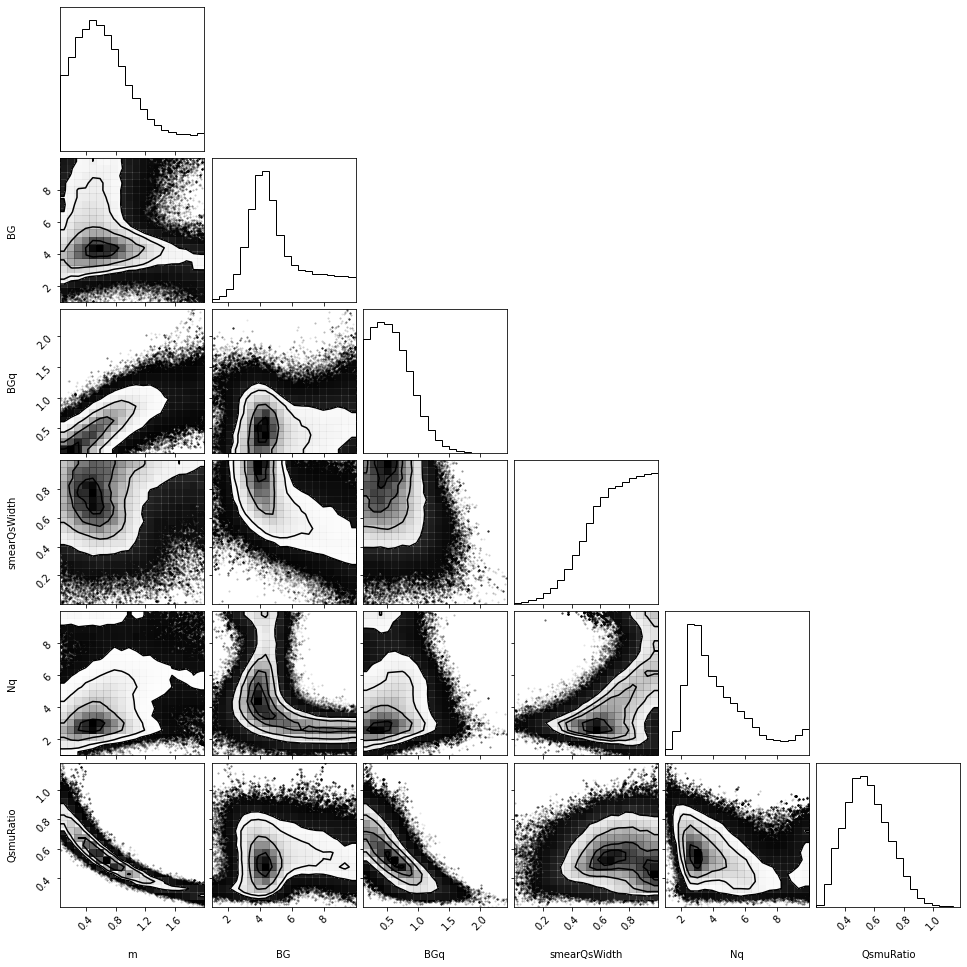

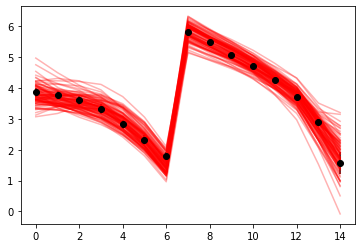

In [4]:
mymcmc.make_plots(sampler.chain)